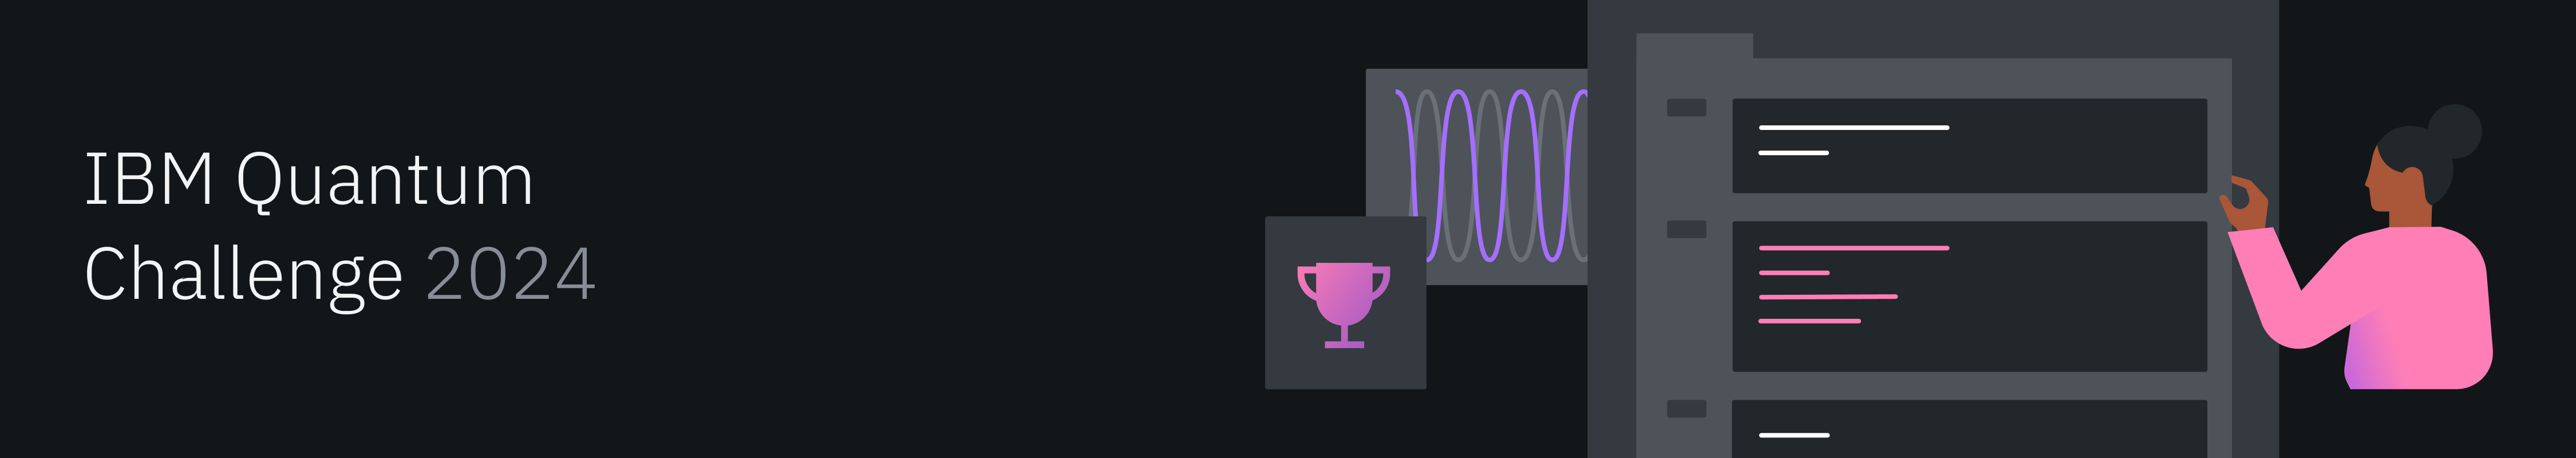

# Bonus Lab: Scaling to 50 qubits!


Ready to elevate your quantum computing skills? Your next challenge is to scale up the results from Lab 4 to 50 qubits! As the system size grows, we'll need to optimize our Variational Quantum Classifier (VQC) and reduce its depth. This is crucial because the mapping used for the `GHZ` state scales linearly with the number of qubits. We’ll adapt our quantum circuits to fit this larger scale and provide you with pre-trained optimal parameters. Your task is to test the functionality of the `VQC` in this extended qubit range.

**Why is this important?** Simulating more than 50 qubits is a significant feat in the quantum world and not many have ventured into running circuits of this size—it's a unique opportunity to push the boundaries of what's achievable in quantum simulations.

Please note, **this is a bonus lab** intended only for those who have successfully completed Lab 4, as it builds directly on the foundations and solutions you've developed. Dive into this advanced challenge and join the elite group experimenting at this level in quantum computing!

## Guideline

* [Step 1: Find a way to efficiently create GHZ states on 50 qubits](#Step-1:-Find-a-way-to-efficiently-create-GHZ-states-on-50-qubits)
* [Step 2: Adapt the `RealAmplitudes` ansatz to the new mapping](#Step-2:-Adapt-the-RealAmplitudes-ansatz-to-the-new-mapping)
* [Step 3: Check the optimal parameters using the `AerSimulator`](#Step-3:-Check-the-optimal-parameters-using-the-AerSimulator)
* [**Final step:** Testing a **50 qubit VQC on a quantum device (!)**](#Final-step:-Testing-a-50-qubit-VQC-on-a-quantum-device-(!))

Let's start by importing all the libraries that you will be needing in this Lab:

# Imports

In [ ]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-serverless -U
%pip install qiskit-transpiler-service -U
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ca49d0fecf04fa396be2436929f4c5f82aaf860311af93fe5fc3d17aaadf511b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.3 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-_86nhopi
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-_86nhopi
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 95c7023dc0b47aaf856e9978c189fcb1d6279a95
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00
  Created wheel for qc-grader: filename=qc_grader-0.19.1-py3-none-any.whl size=40567 sha256=9f03a5667a44534a96804cbcd23e21f5bb8ce27e5ba4925843814e274e83278d
  Stored in direct

Now, let's run our imports

In [ ]:
# Import all in one cell

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map, plot_circuit_layout, plot_distribution
from qiskit.circuit import ParameterVector

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    EstimatorV2 as Estimator,
    SamplerV2 as Sampler,
    EstimatorOptions
)
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Save API Token, if needed

%set_env QXToken=#inserttokenhere
# Make sure there is no space between the equal sign
# and the beginning of your token

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="<inserttokenhere>",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

In [ ]:
# qc-grader should be 0.18.13 (or higher)
import qc_grader

qc_grader.__version__

'0.19.1'

In [ ]:
from qc_grader.challenges.iqc_2024 import grade_lab_bonus_ex1, grade_lab_bonus_ex2, grade_lab_bonus_ex3

#Analyzing IBM Kyoto Architechture to build 50 qubit superposition
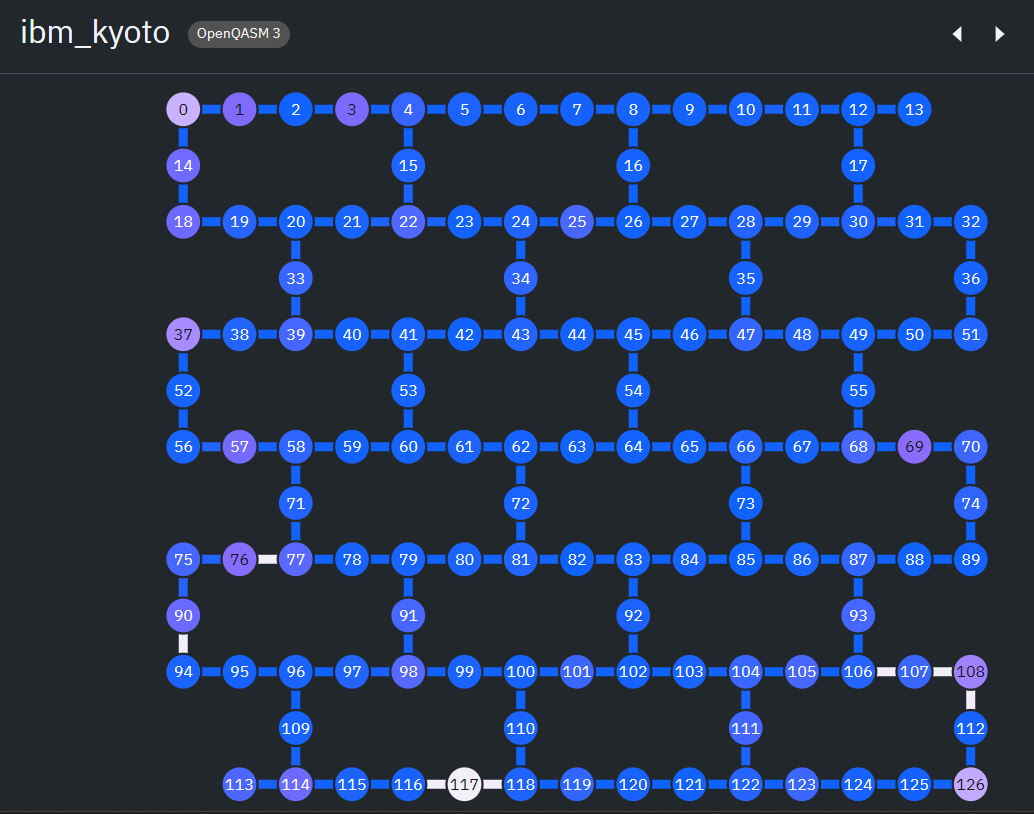

In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

In [ ]:
# Coupling map of the backend
coupling_map = backend.coupling_map
edges = list(coupling_map.get_edges()) #list of undirected edges

In [ ]:
#constants
total_qubits = 127
no_qubits = 50
root = 62
num_qubits = no_qubits

In [ ]:
#we only need 50 qubits
class Node:
  def __init__(self, no):
    self.no = no
    self.neighbors = []
    self.visited = False
  def __str__(self):
    return f"Node_{self.no}_adj_{[neighbor.no for neighbor in self.neighbors]}"

graph = [Node(i) for i in range(total_qubits)]

In [ ]:
for a, b in edges:
  graph[a].neighbors.append(graph[b])
  graph[b].neighbors.append(graph[a])

#we will use qubit 62 as root
print(graph[root])

Node_62_adj_[61, 63, 72]


In [ ]:
#do bfs from 62 till 50 nodes connected, and keep track of parent in list
con = []
cur = [graph[root]]
graph[root].visited = True

while True:
  nxt = []
  for node in cur:
    for neighbor in node.neighbors:
      if not neighbor.visited:
        nxt.append(neighbor)
        con.append((node, neighbor))
        neighbor.visited = True
      flag =  len(con) == no_qubits - 1
      if flag:
        break
    if flag:
      break
  if flag:
    break
  cur = nxt

In [ ]:
connections = [(i.no, j.no) for i, j in con]
print(connections)
print(len(connections)) #49 since root is already connected

[(62, 61), (62, 63), (62, 72), (61, 60), (63, 64), (72, 81), (60, 53), (60, 59), (64, 54), (64, 65), (81, 80), (81, 82), (53, 41), (59, 58), (54, 45), (65, 66), (80, 79), (82, 83), (41, 40), (41, 42), (58, 57), (58, 71), (45, 44), (45, 46), (66, 67), (66, 73), (79, 78), (79, 91), (83, 92), (83, 84), (40, 39), (42, 43), (57, 56), (71, 77), (46, 47), (67, 68), (73, 85), (91, 98), (92, 102), (39, 33), (39, 38), (43, 34), (56, 52), (77, 76), (47, 35), (47, 48), (68, 55), (68, 69), (85, 86)]
49


In [ ]:
#mappings
nodes = set()
nodes.add(root)
for i, j in connections:
  nodes.add(j)
print(nodes)
print(len(nodes)) #if 49 no duplicates => bfs algo is correct

{33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 91, 92, 98, 102}
50


In [ ]:
mappings = dict((x, i) for i, x in enumerate(nodes))
print(mappings)
print(len(mappings))

{33: 0, 34: 1, 35: 2, 38: 3, 39: 4, 40: 5, 41: 6, 42: 7, 43: 8, 44: 9, 45: 10, 46: 11, 47: 12, 48: 13, 52: 14, 53: 15, 54: 16, 55: 17, 56: 18, 57: 19, 58: 20, 59: 21, 60: 22, 61: 23, 62: 24, 63: 25, 64: 26, 65: 27, 66: 28, 67: 29, 68: 30, 69: 31, 71: 32, 72: 33, 73: 34, 76: 35, 77: 36, 78: 37, 79: 38, 80: 39, 81: 40, 82: 41, 83: 42, 84: 43, 85: 44, 86: 45, 91: 46, 92: 47, 98: 48, 102: 49}
50


In [ ]:
print(nodes)

{33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 91, 92, 98, 102}


#50 qubit 3 layer entanglement for realamplitudes ansatz
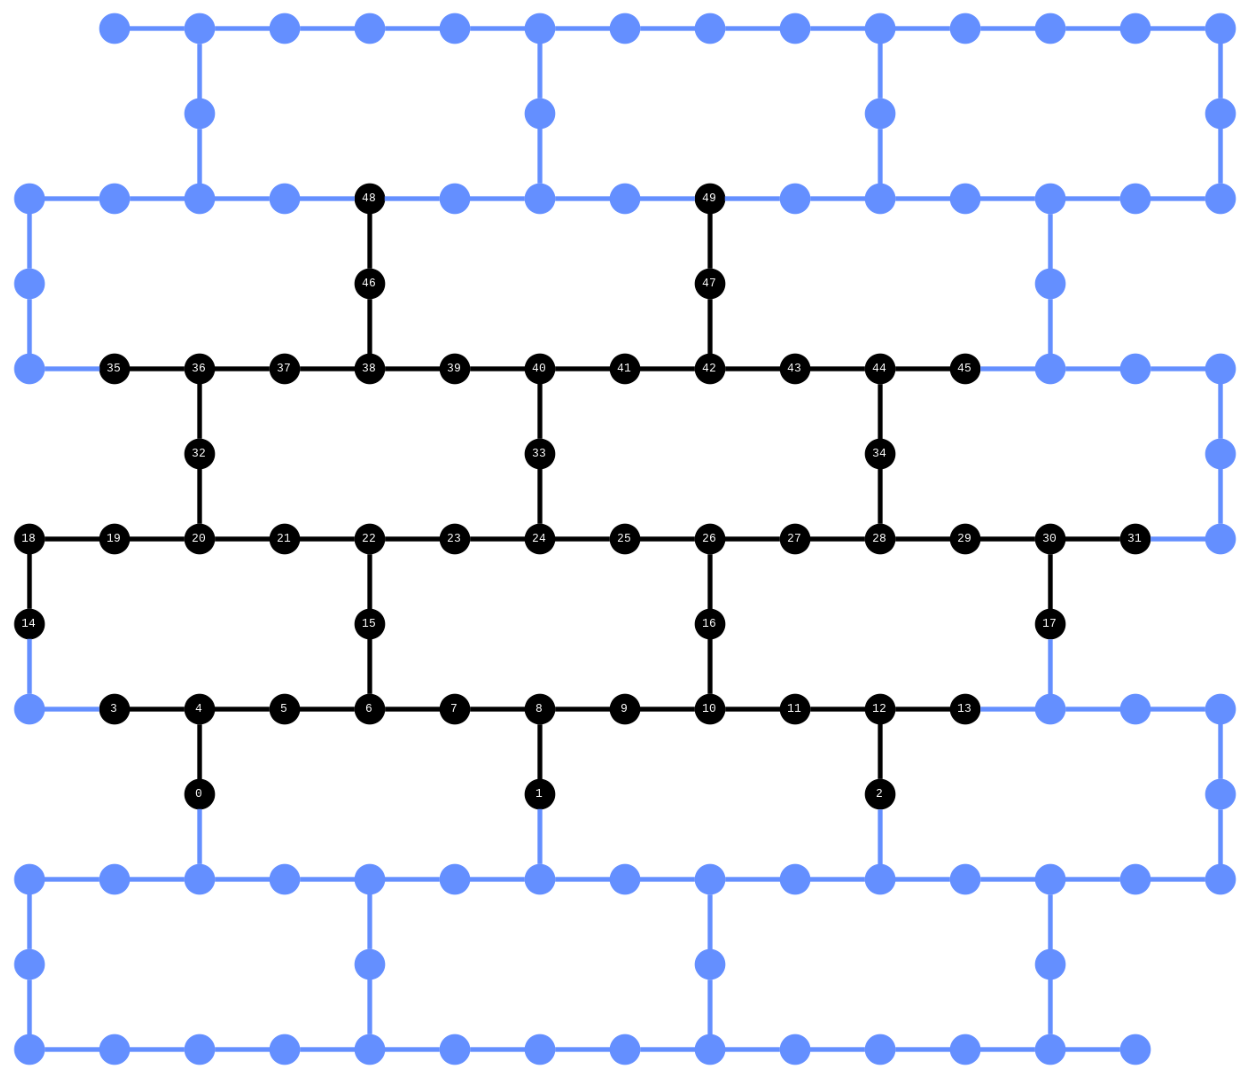

#dividing into 3 alternating layers

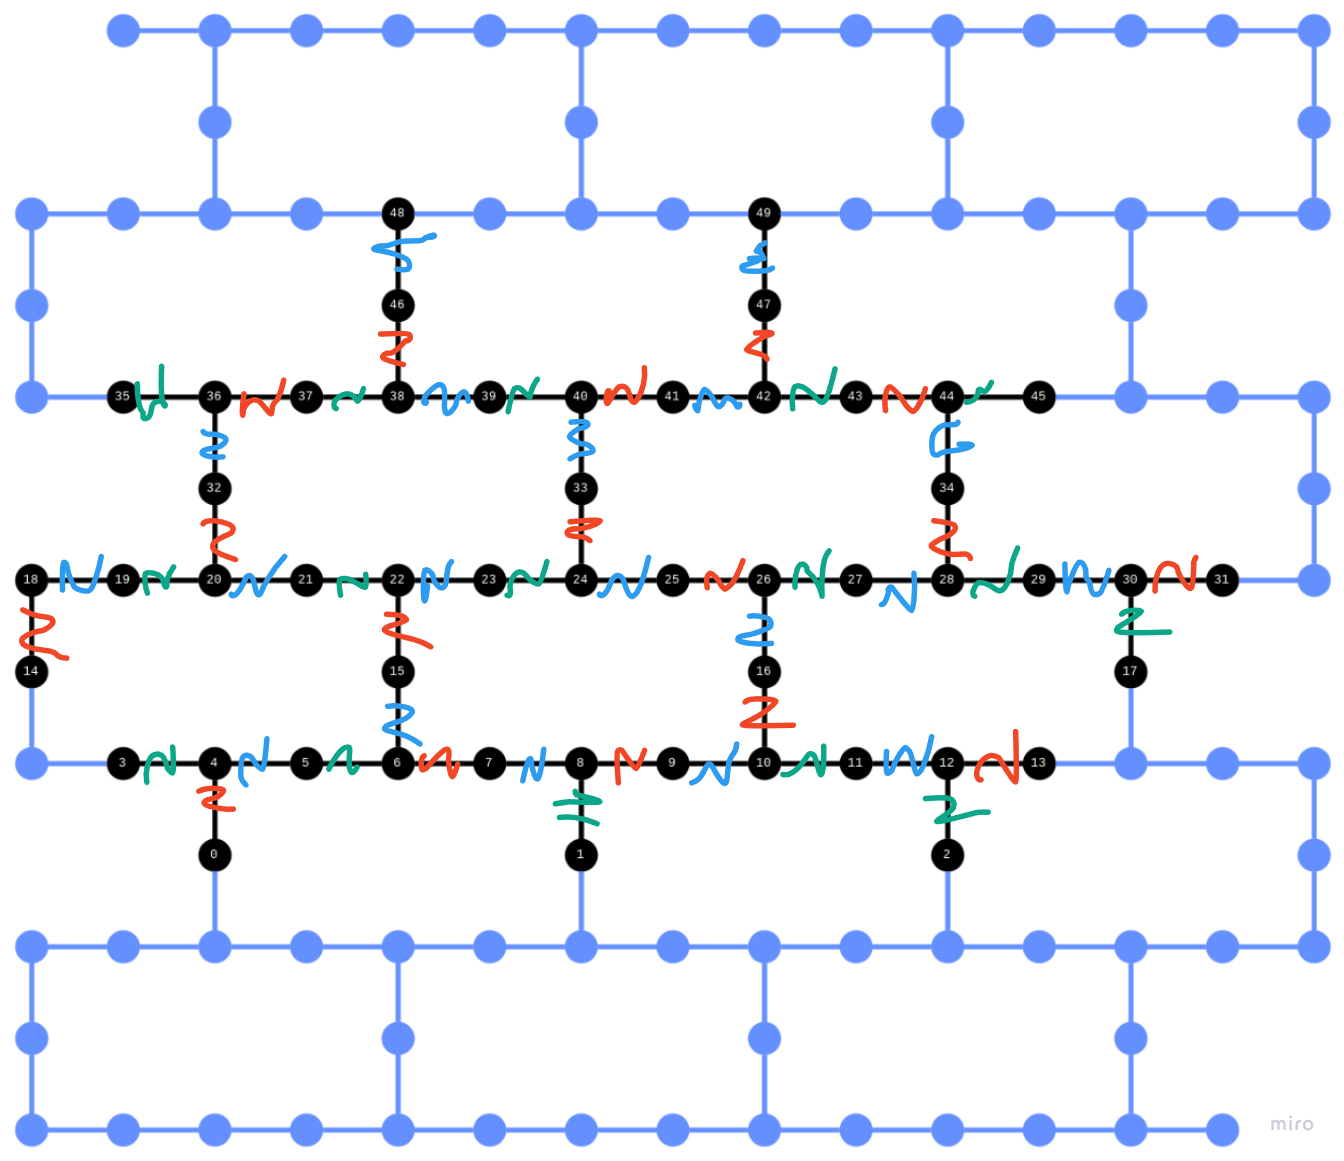

> Add blockquote



In [ ]:
blue_edges = [
    (4, 5), (7, 8), (9, 10), (11, 12), (18, 19), (20, 21), (22, 23), (24, 25), (27, 28), (29, 30), (38, 39), (41, 42),
    (6, 15), (16, 26), (32, 36), (33, 40), (34, 44), (46, 48), (47, 49)
]

red_edges = [
    (6, 7), (8, 9), (12, 13), (25, 26), (30, 31), (36, 37), (40, 41), (43, 44),
    (0, 4), (14, 18), (15, 22), (10, 16), (20, 32), (24, 33), (28, 34), (38, 46), (42, 47)
]

green_edges = [
    (3, 4), (5, 6), (10, 11),(19, 20), (21, 22), (23, 24),(26, 27), (28, 29), (37, 38), (35, 36), (39, 40), (42, 43), (44, 45),
    (1, 8), (2, 12), (17, 30)
]


ansatz_connections = blue_edges + red_edges + green_edges
sources = [map[0] for map in ansatz_connections]
print(ansatz_connections)
print(sources)

[(4, 5), (7, 8), (9, 10), (11, 12), (18, 19), (20, 21), (22, 23), (24, 25), (27, 28), (29, 30), (38, 39), (41, 42), (6, 15), (16, 26), (32, 36), (33, 40), (34, 44), (46, 48), (47, 49), (6, 7), (8, 9), (12, 13), (25, 26), (30, 31), (36, 37), (40, 41), (43, 44), (0, 4), (14, 18), (15, 22), (10, 16), (20, 32), (24, 33), (28, 34), (38, 46), (42, 47), (3, 4), (5, 6), (10, 11), (19, 20), (21, 22), (23, 24), (26, 27), (28, 29), (37, 38), (35, 36), (39, 40), (42, 43), (44, 45), (1, 8), (2, 12), (17, 30)]
[4, 7, 9, 11, 18, 20, 22, 24, 27, 29, 38, 41, 6, 16, 32, 33, 34, 46, 47, 6, 8, 12, 25, 30, 36, 40, 43, 0, 14, 15, 10, 20, 24, 28, 38, 42, 3, 5, 10, 19, 21, 23, 26, 28, 37, 35, 39, 42, 44, 1, 2, 17]


In [ ]:
#hmm i hav jus added all the edges technically, lets do it again but simpler
filtered_edges = []

for edge in edges:
    if edge[0] in nodes and edge[1] in nodes:
        filtered_edges.append((mappings[edge[0]], mappings[edge[1]]))

filtered_edges

[(0, 4),
 (1, 8),
 (3, 4),
 (4, 5),
 (5, 6),
 (7, 6),
 (8, 7),
 (9, 8),
 (9, 10),
 (11, 10),
 (12, 2),
 (12, 11),
 (13, 12),
 (15, 6),
 (15, 22),
 (16, 10),
 (16, 26),
 (17, 30),
 (18, 14),
 (19, 18),
 (19, 20),
 (21, 20),
 (21, 22),
 (23, 22),
 (24, 23),
 (24, 25),
 (25, 26),
 (26, 27),
 (27, 28),
 (29, 28),
 (29, 30),
 (30, 31),
 (32, 20),
 (33, 24),
 (34, 28),
 (34, 44),
 (35, 36),
 (36, 32),
 (36, 37),
 (38, 37),
 (38, 46),
 (39, 38),
 (40, 33),
 (40, 39),
 (41, 40),
 (41, 42),
 (42, 47),
 (43, 42),
 (43, 44),
 (45, 44),
 (48, 46),
 (49, 47)]

In [ ]:
print(len(ansatz_connections), len(filtered_edges))

52 52


## Step 1: Find a way to efficiently create GHZ states on 50 qubits

Start by recovering your amplitude embedding function from Lab 4:

In [ ]:
def old_amplitude_embedding(num_qubits, bird_index):
    """Create amplitude embedding circuit

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """
    def generate_GHZ(qc):
        qc.h(0)
        for i, j in zip(range(num_qubits-1), range(1,num_qubits)):
            qc.cx(i, j)

    ### Write your code below here ###

    qc = QuantumCircuit(num_qubits)

    ### Write your code below here ###
    if bird_index < 5:
      generate_GHZ(qc)

    for i, bit in enumerate(bin(bird_index)[2:][::-1]):
      if bit == '1':
        qc.x(i)

    ### Don't change any code past this line ###
    return qc

The generation of the GHZ state in the previous `old_amplitude_embedding` function scales linearly with the number of qubits. You can check it using the following cells from Lab 4:

In [ ]:
# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 3 # You can check different birds by changing the index
qc = old_amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

Depth of two-qubit gates:  49


If the two-qubit depth is of the order of 50 it is too large!!

<a id="step1"></a>
<div class="alert alert-block alert-success">

**Task:** Find a way to efficiently encode the GHZ states in a large circuit and reduce the circuit two-qubit depth to 13 or less. This [blog post](https://dahalegopal27.medium.com/greetings-from-the-ibm-spring-challenge-map-of-127-qubits-ce08817176a7) can serve as inspiration!

> _The underlying concept leverages the symmetry in entangled qubits. Once two qubits are entangled, their symmetrical properties can be utilized to entangle additional qubits. This cascading entanglement process can be very efficient if the quantum system allows for all-to-all connectivity; in such a scenario, creating a GHZ state involving
$𝑁$ qubits requires only an asymptotic complexity of $(O(\log(N)))$ steps._

> _However, in systems with heavy hexagonal (heavy hex) connectivity, the process is less efficient, and requires $(O(\sqrt{N}))$ steps to achieve the same._

</div>

In [ ]:
def new_amplitude_embedding(num_qubits, bird_index):
    """Create efficient amplitude embedding circuit

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """
    def generate_GHZ(n, qc):
      ### Write your code below here ###

      # Create a bell pair
      qc.h(mappings[root])
      for i, j in connections:
        qc.cx(mappings[i], mappings[j])

    qc = QuantumCircuit(num_qubits)

    ### Write your code below here ###
    if bird_index < 5:
      generate_GHZ(num_qubits, qc)

    for i, bit in enumerate(bin(bird_index)[2:][::-1]):
      if bit == '1':
        qc.x(i)

    qc.barrier()
    ### Don't change any code past this line ###
    return qc

The `matrix_product_state` [MPS](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html) method is more efficient than a full statevector simulation because it reduces the computational and memory demands. While the full statevector simulation requires exponential resources in relation to the number of qubits, MPS uses a tensor-based representation that scales more favorably, particularly in systems with low entanglement. This allows MPS to perform operations faster and with less memory in many scenarios, making it particularly effective for circuits that aren't heavily entangled and are low in depth.

**You can find more about this in the documentation link [here.](https://qiskit.github.io/qiskit-aer/tutorials/7_matrix_product_state_method.html#id1)**

**You can use the following cell below to check that you are mapping the right states.**


<div class="alert alert-block alert-danger">

**Please note:** Please make sure your `GHZ` is constructed correct using the code block below. Try experimenting with different values of index and ensure you get a `GHZ` state.

</div>

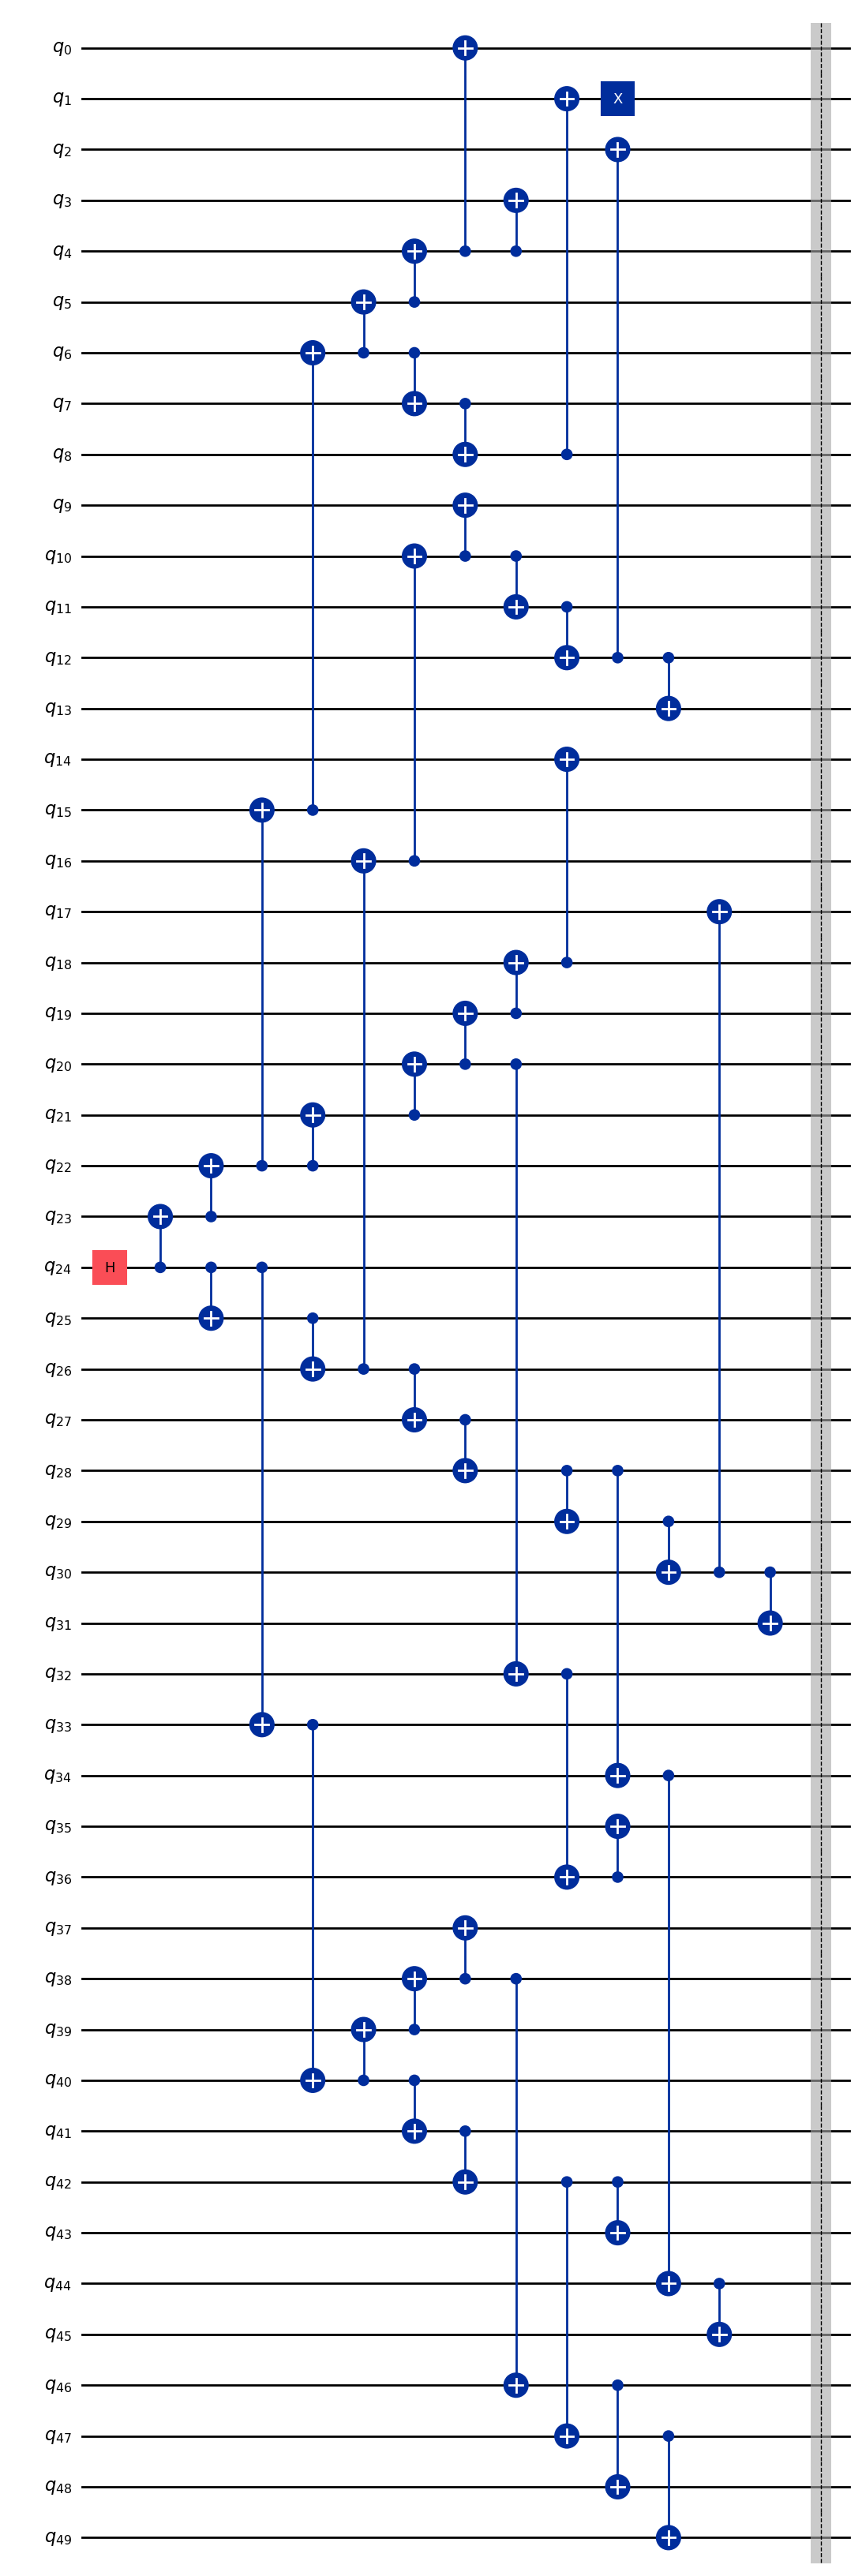

In [ ]:
index = 2 # Change to different values for testing
qc = new_amplitude_embedding(num_qubits, index)
qc.draw(output="mpl")

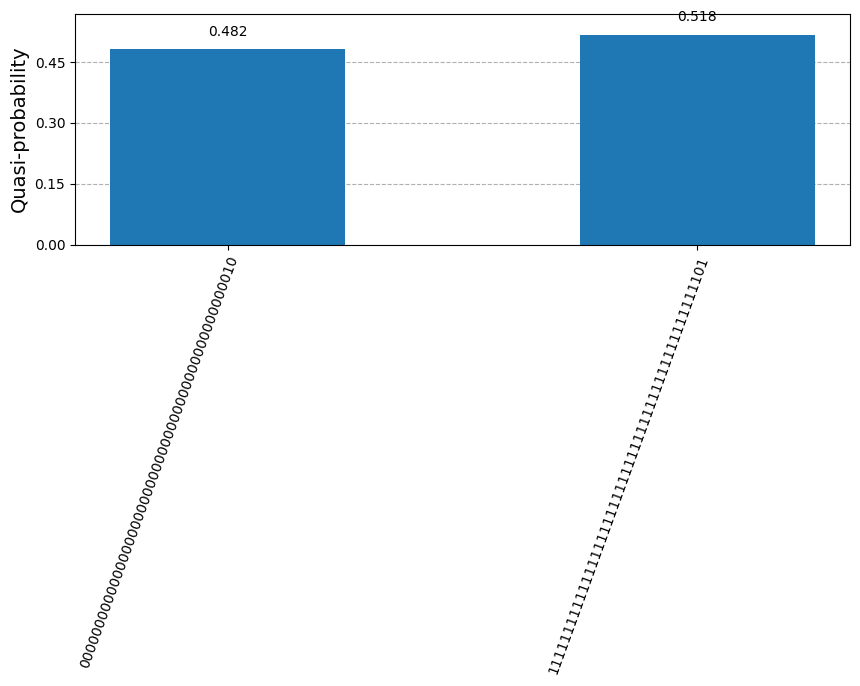

In [ ]:
qc.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator(method='matrix_product_state')
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc)
# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit]).result()
samp_dist = result[0].data.meas.get_counts()
plot_distribution(samp_dist, figsize=(10, 3))

And you can check the new qubit two-qubit depth here:

Depth of two-qubit gates:  10


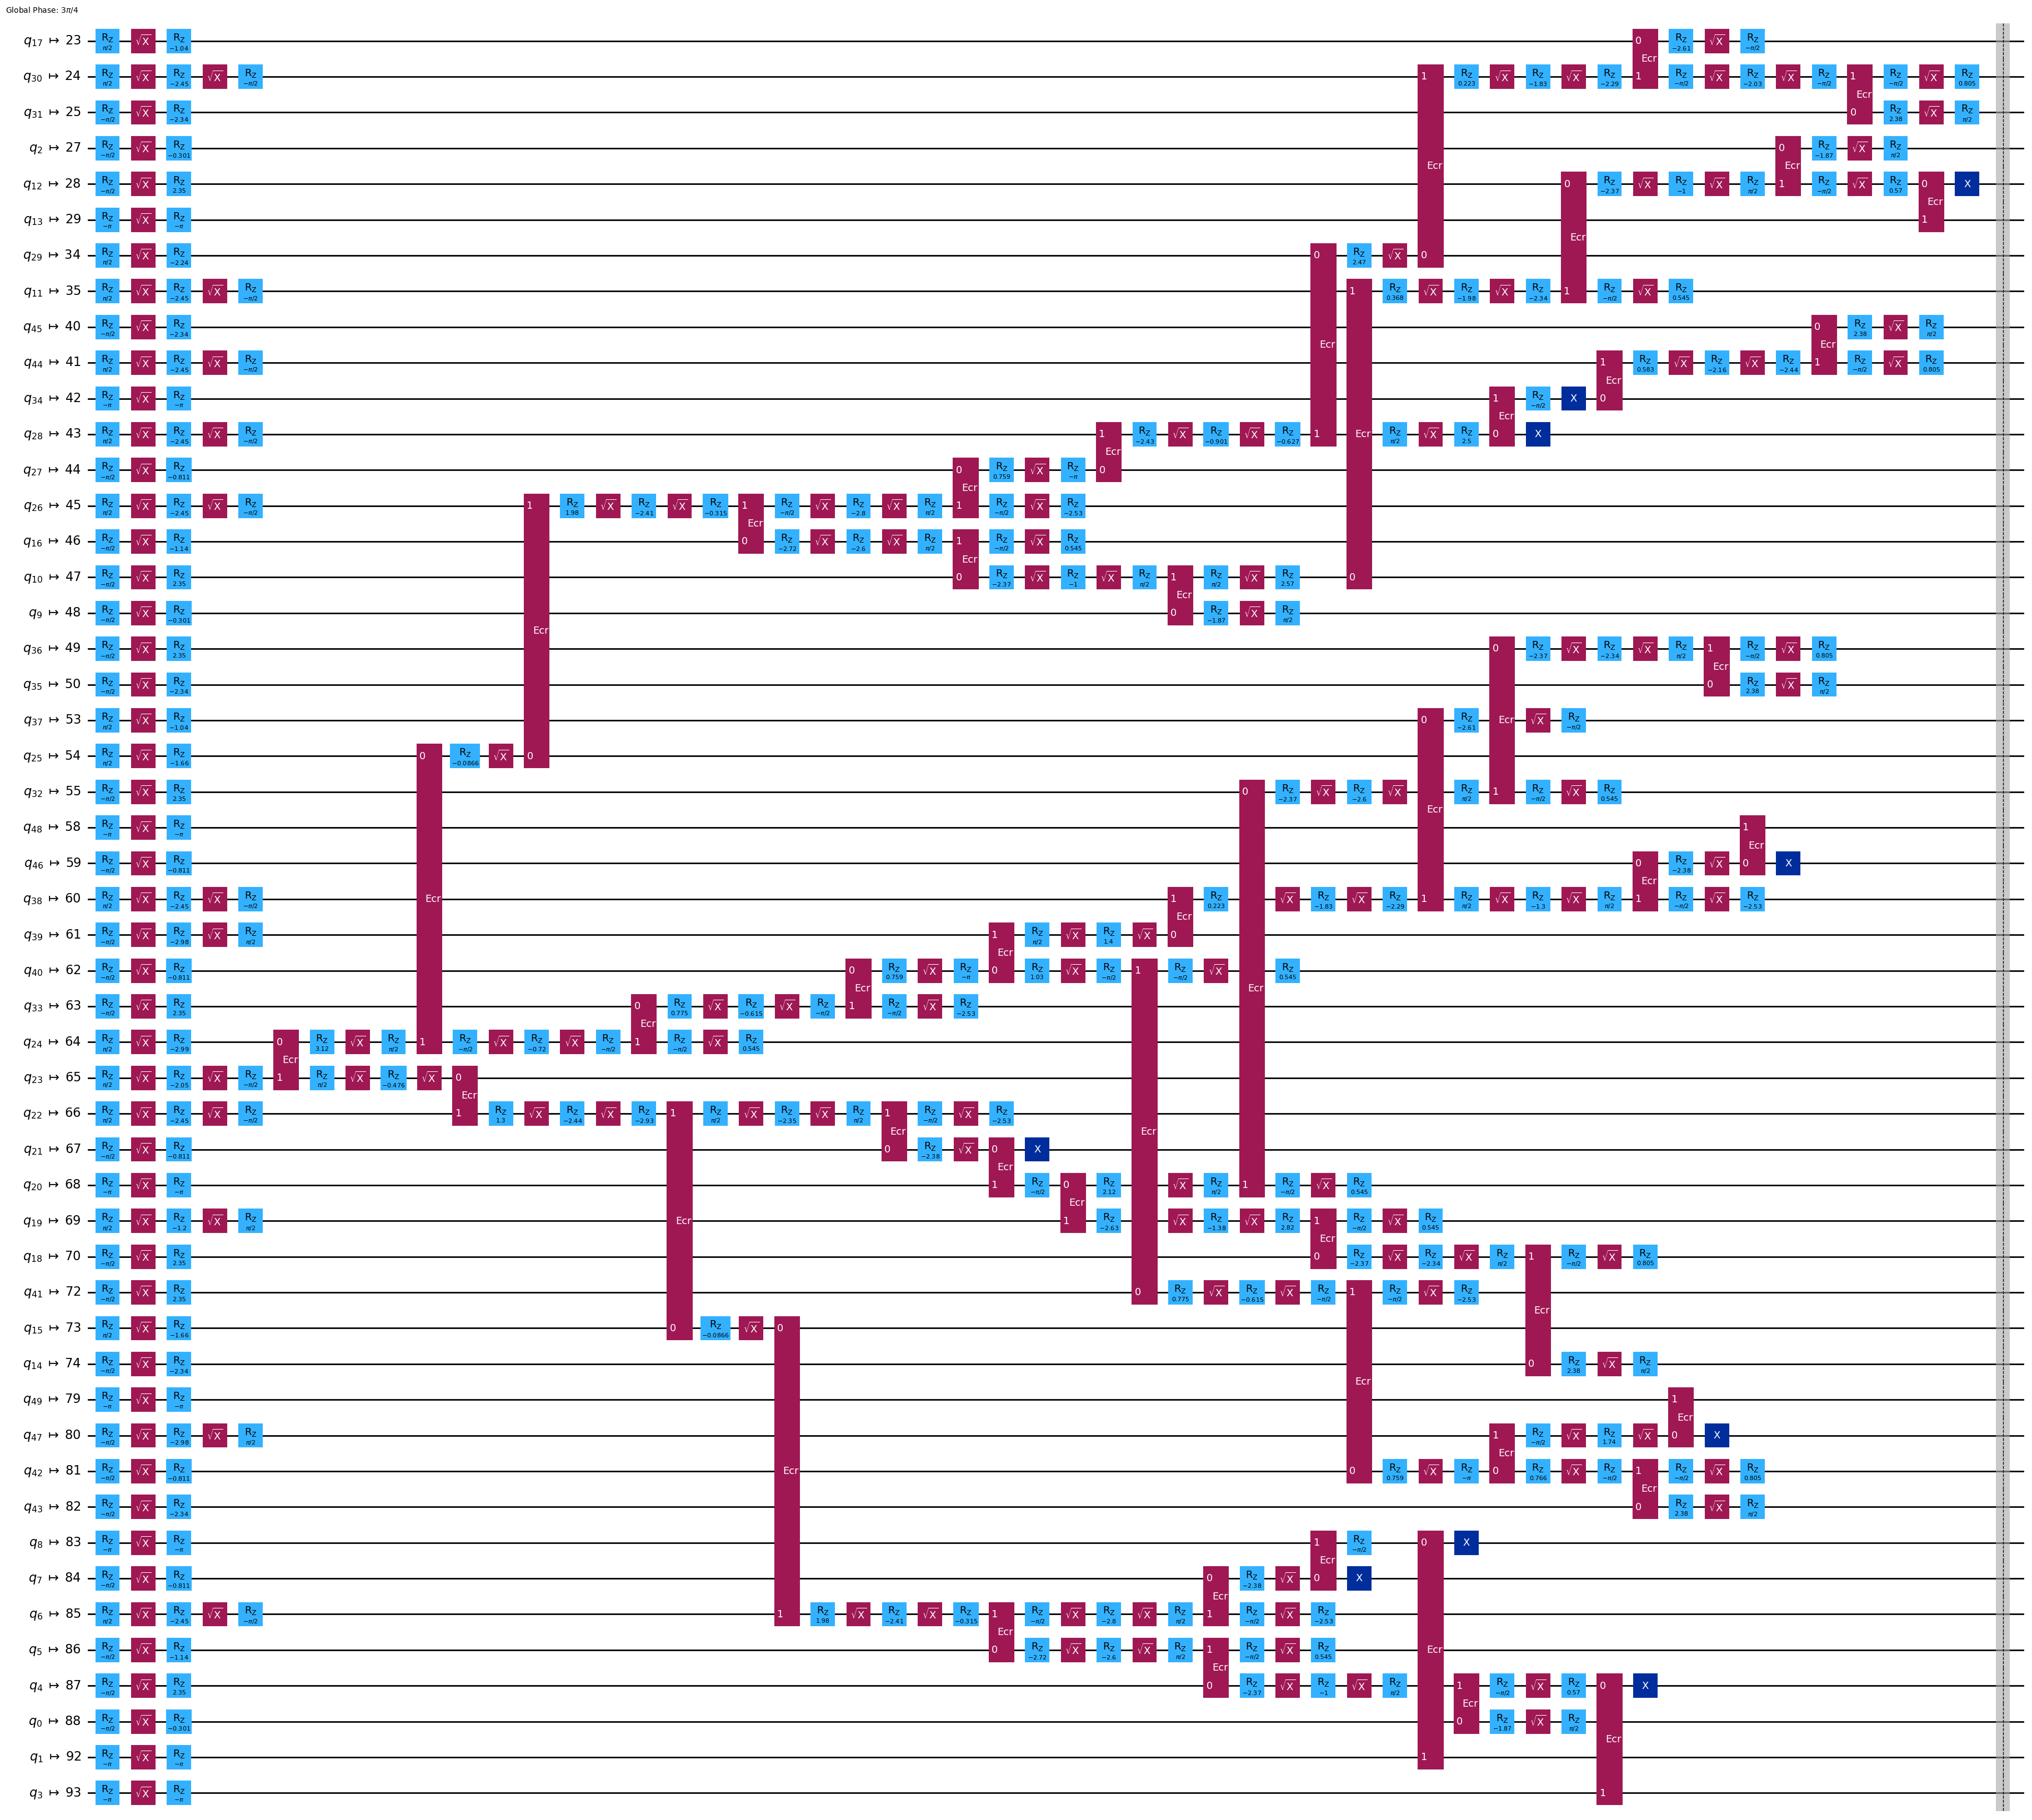

In [ ]:
# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 0 #You can check different birds by changing the index
qc = new_amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

In [ ]:
# Submit your answer using following code
grade_lab_bonus_ex1(new_amplitude_embedding(50,3)) # Expected answer type: QuantumCircuit

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


## Step 2: Adapt the `RealAmplitudes` ansatz to the new mapping

The previous ansatz needs to be adapted to the new connectiviy, but without increasing the layers. Check that, when transpiling the ansatz with `pairwise` connectivity together with the `new_amplitude_embedding`, the circuit is more than **100 layers(!)**

In [ ]:
def generate_old_ansatz(qubits):
    qc = RealAmplitudes(qubits, reps=1, entanglement='pairwise')
    qc.barrier()
    return qc

# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 0 # You can check different birds by changing the index
qc = new_amplitude_embedding(num_qubits, index_bird)
ansatz = generate_old_ansatz(num_qubits)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
transpiled_qc = pm.run(qc.compose(ansatz))
print('Depth new mapping + old ansatz: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

Depth new mapping + old ansatz:  105


<a id="exercise3"></a>
<div class="alert alert-block alert-success">

**Task:** Change the entanglement structure of the `RealAmplitudes` ansatz so that the total two-qubit depth of the circuit (embedding + ansatz) is reduced to **less than `15` layers**.

*Hint: Consider the mapping that you have used for the `GHZ` state for the heavy hex lattice and try to entangle the qubits to the neighbouring ones if possible, with only 3 alternating layers.*

</div>  

In [ ]:
def generate_ansatz(num_qubits):
    """Generate a `RealAmplitudes` ansatz where all qubits are entangled with each other

    Parameters:
        num_qubits (int): Number of qubits for the ansatz

    Returns:
        qc (QuantumCircuit): Quantum circuit with the generated ansatz
    """
    ### Write your code below here ###
    entanglement_pattern = ansatz_connections
    qc = RealAmplitudes(num_qubits, reps=1, entanglement=entanglement_pattern, skip_unentangled_qubits=True)
    qc.barrier()
    ### Don't change any code past this line ###
    return qc

In [ ]:
old = generate_old_ansatz(num_qubits)
new = generate_ansatz(num_qubits)

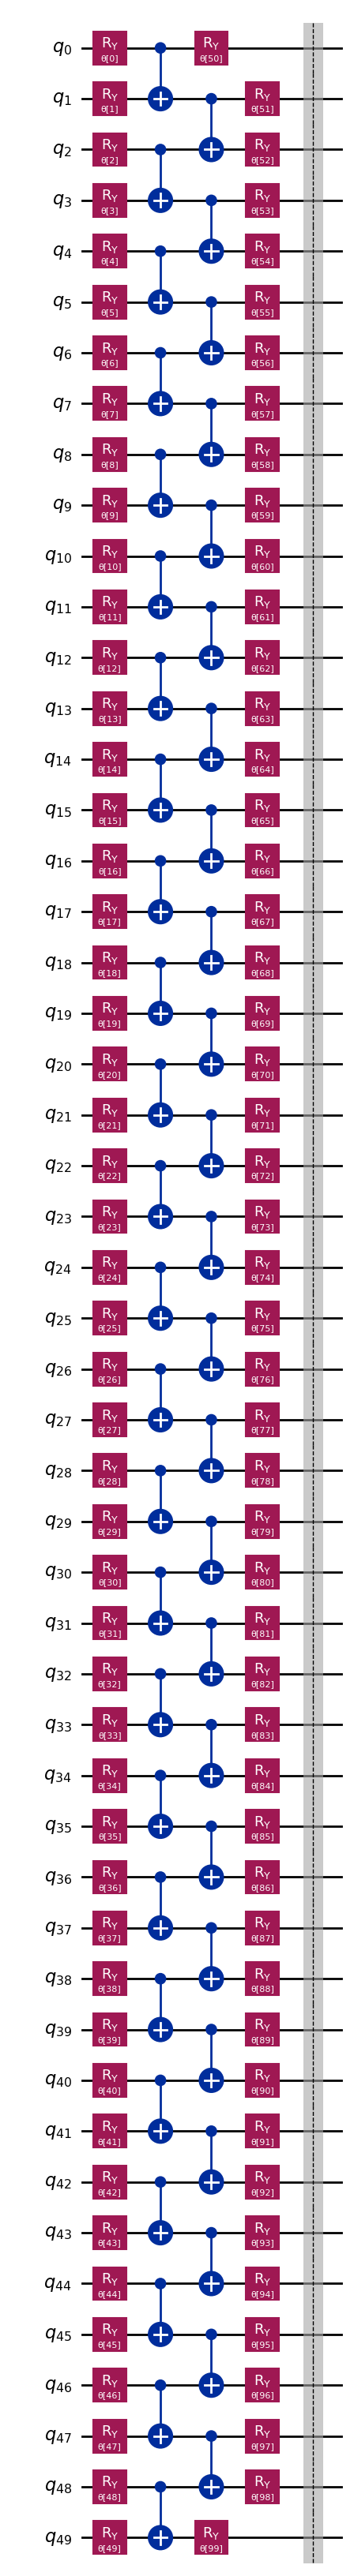

In [ ]:
old.decompose().draw(output = "mpl")

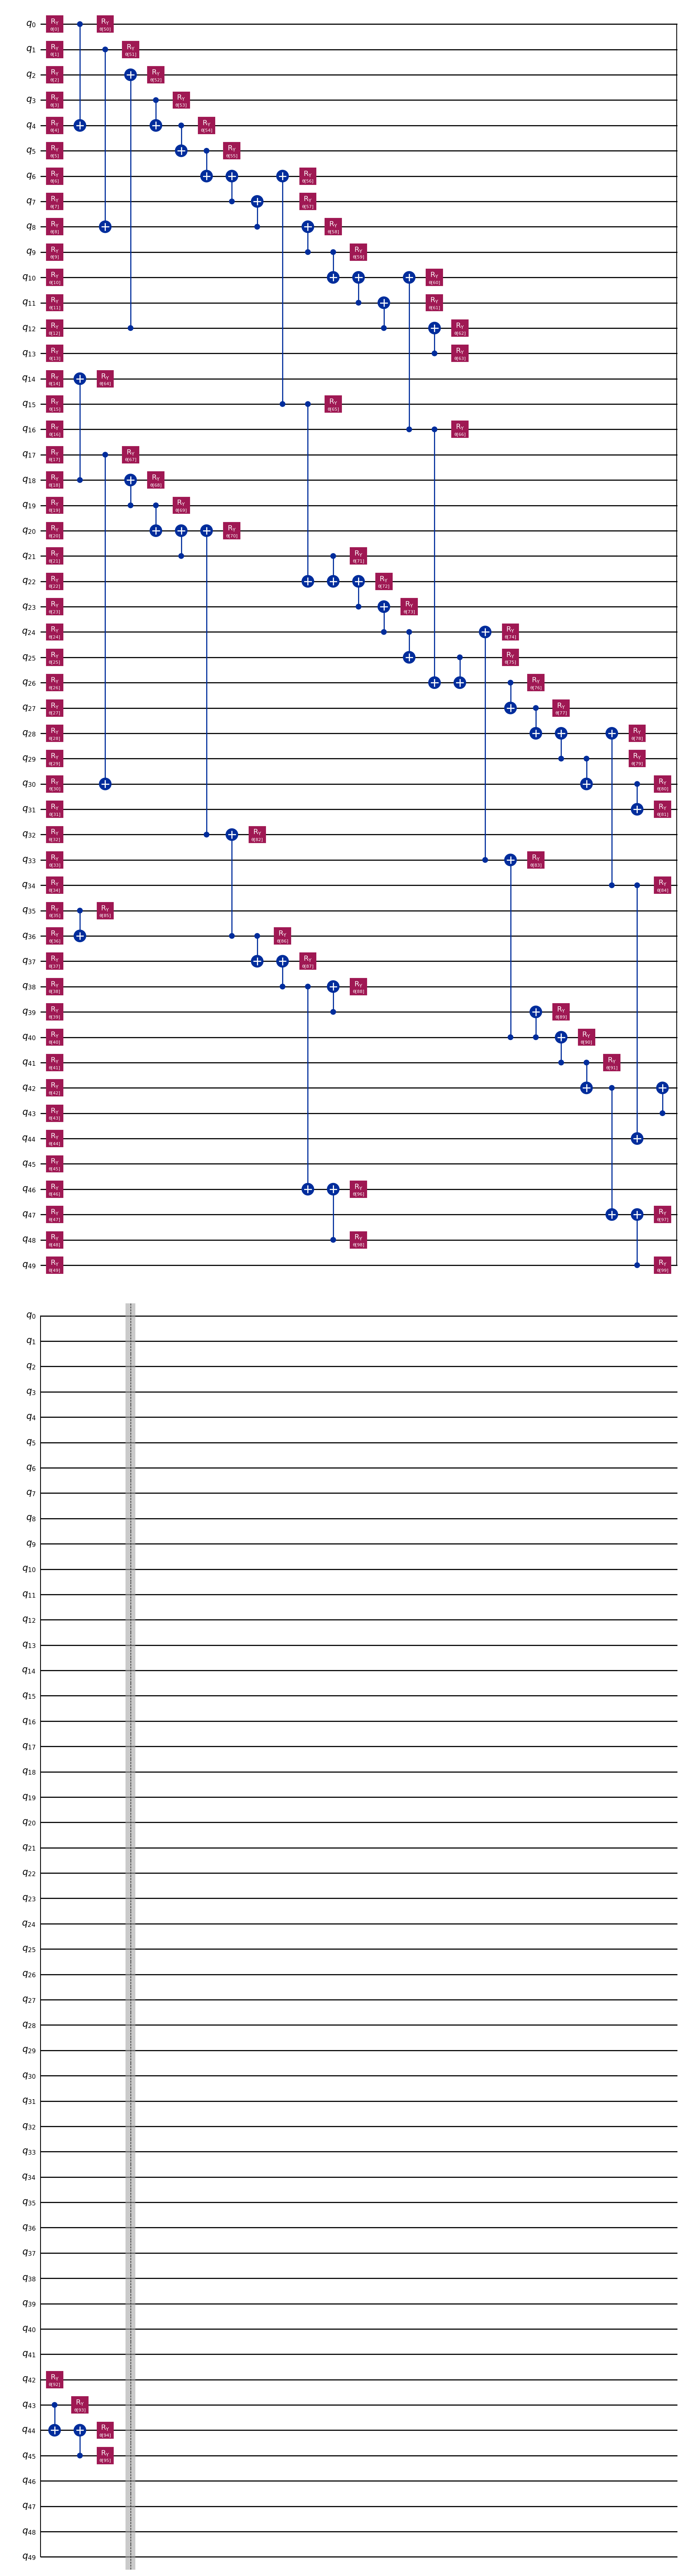

In [ ]:
new.decompose().draw(output = "mpl")

##### Run this cell to check the total two-qubit depth

Depth new mapping + new ansatz:  13


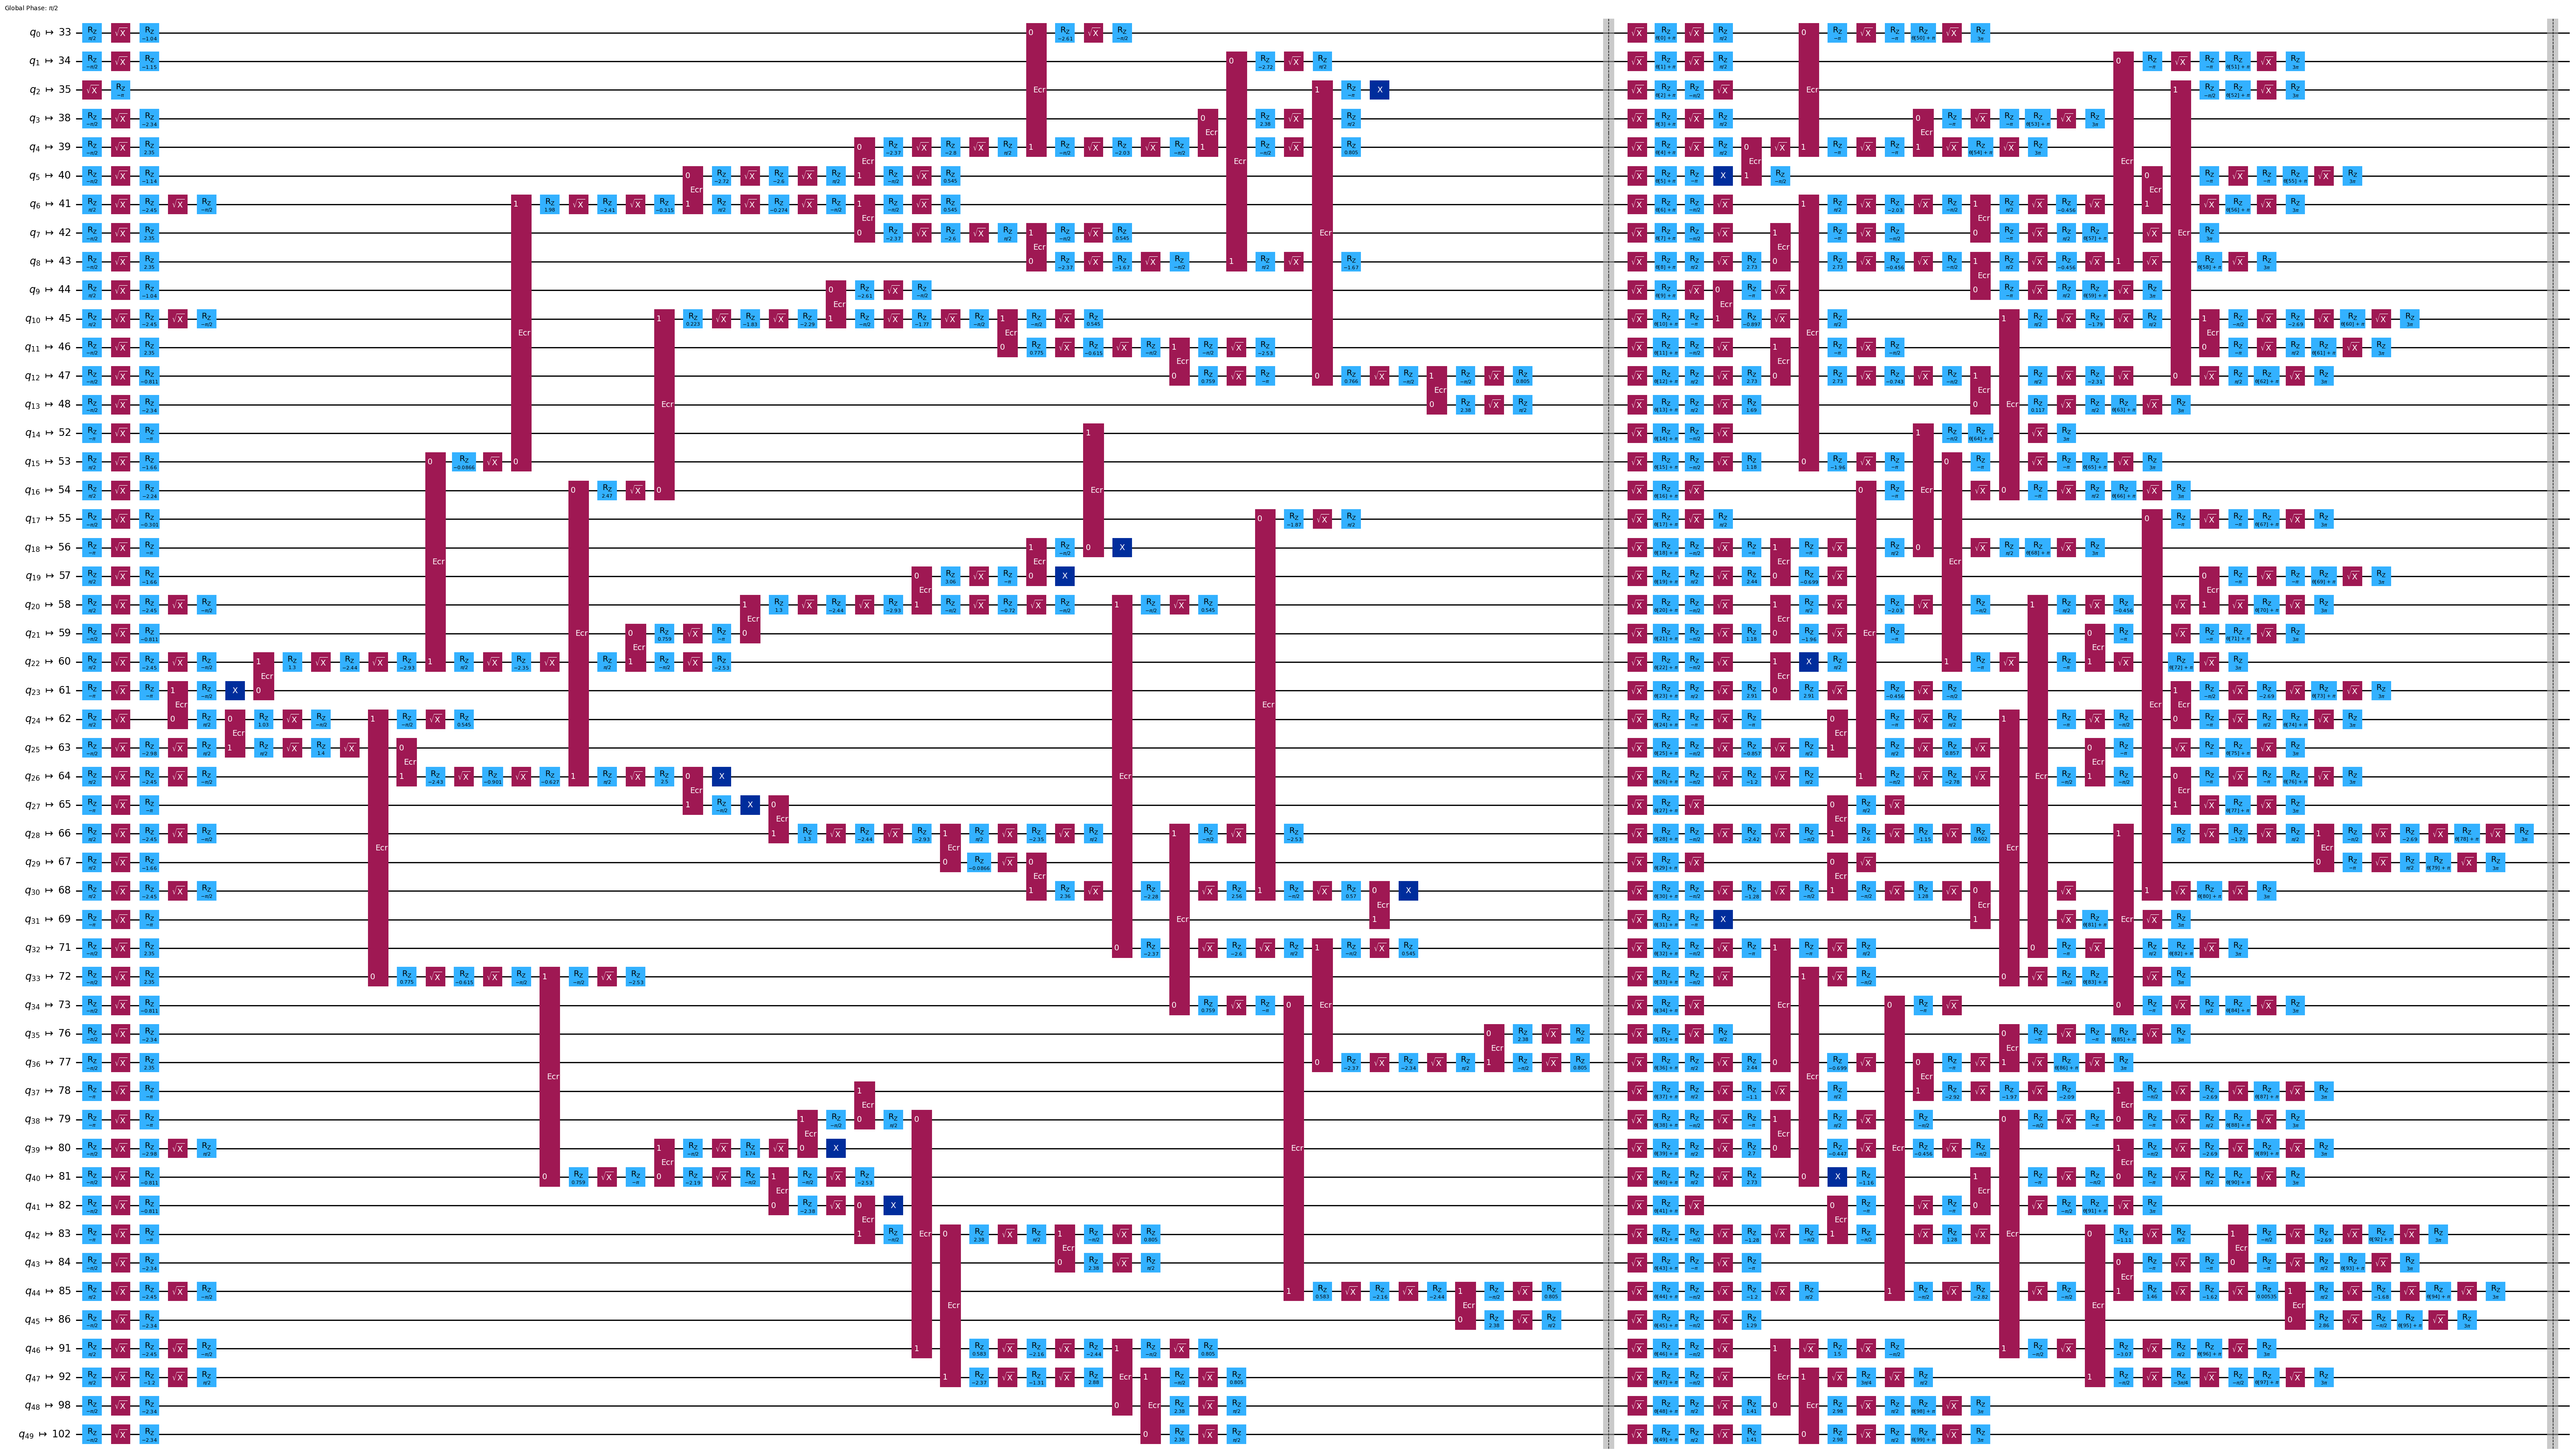

In [ ]:
index_bird = 2 # You can check different birds by changing the index
new_mapping_qc = new_amplitude_embedding(num_qubits, index_bird)
ansatz = generate_ansatz(num_qubits)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend, initial_layout= list(nodes))
transpiled_qc = pm.run(new_mapping_qc.compose(ansatz))
print('Depth new mapping + new ansatz: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

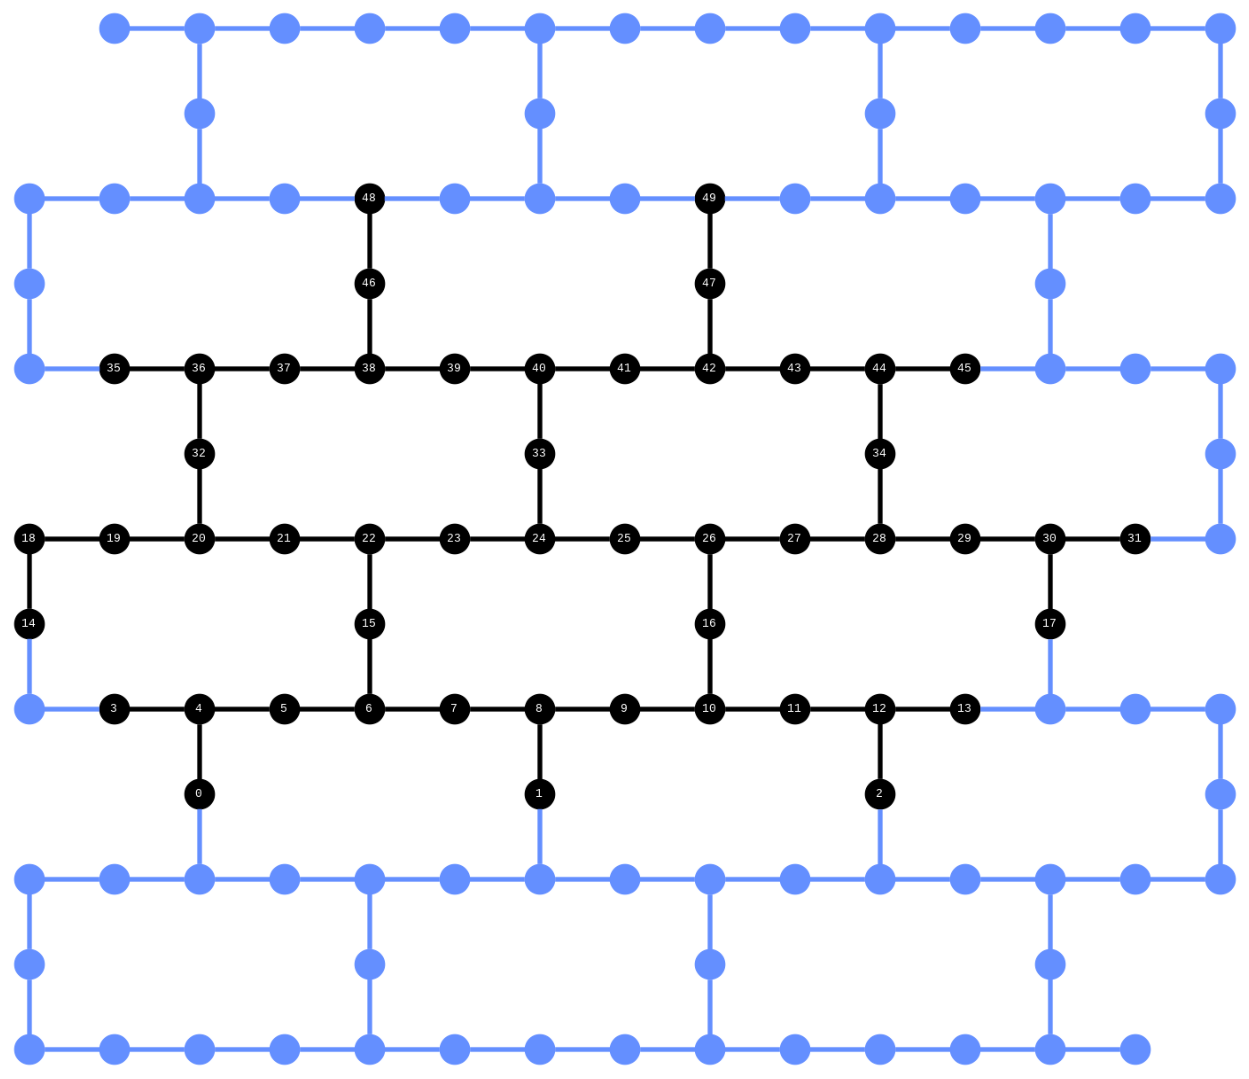

In [ ]:
#mapping of qubits in hardware
display(plot_circuit_layout(pm.run(qc), backend))

In [ ]:
# Submit your answer using following code
grade_lab_bonus_ex2(transpiled_qc) # Expected answer type: QuantumCircuit

## Step 3: Check the optimal parameters using the `AerSimulator`

Now we need to generalize the optimal parameters for a 50 qubits VQC.

<a id="exercise3"></a>
<div class="alert alert-block alert-success">

**Task:** The optimal parameters array should have $\pi$ in the first rotation of `RealAmplitudes` for the qubits that are used to entangle other qubits and zero everywhere else.

*Hint: The easiest way to do this is to generate a `source_list` which contains all qubits which are used as source for any `CX` operation in the ansatz.*

</div>  

In [ ]:
# Generate this to match your ansatz
#source_list = sources# Add your code here

# You can check looking at 2 images above, that the controls and targets, match all of the image!
controls = [i[0] for i in ansatz_connections]
targets = [i[1] for i in ansatz_connections]

### POSSIBLE SOURCE LISTS:
# 1) Source list = all the qubits that:
# - are used as a control
# - but not as a target
# You can also check these are all the qubits in the coupling map, that only have dots on them (control), no Xs (targets)!
source_list = list(dict.fromkeys([control for control in controls if control not in targets])) # Add your code here

def generalize_optimal_params(num_qubits, ansatz, source_list):
    """Generate a `list of optimal parameters for N qubits

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        ansatz (QuantumCircuit): Ansatz for our VQC
        source_list (list): List of qubits used as source to entangle other qubits

    Returns:
        opt_params (list): List of optimal parameters generated for N qubits
    """

    opt_params = np.zeros(ansatz.num_parameters)
    for i in range(ansatz.num_parameters//2):
        if i in source_list:
            opt_params[i] = np.pi

    return opt_params

<a id="exercise3"></a>
<div class="alert alert-block alert-success">

**Task:** Let's recover the `compute_performance` and the `test_shallow_VQC` functions from Lab 4, both to test with the `AerSimulator` and for a `QPU`. Modify the cost function by including a `-1` factor, as the parameters previously calculated are optimized for the inverse of the cost function.

**Please note:** You need to use the `new_amplitude_embedding` and the `generate_ansatz` functions which you created above

</div>  

In [ ]:
def test_shallow_VQC_QPU(num_qubits, list_labels, obs, opt_params, options, backend):
    """Tests the shallow VQC on a QPU

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        list_labels (list): List of labels
        obs: (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Options for Estimator primitive
        backend (Backend): Real backend from IBM Quantum to run the job

    Returns:
        job_id (str): Job ID for Quantum job
    """

    ### Write your code below here ###
    estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend, initial_layout= list(nodes))

    pubs = []
    for bird, label in enumerate(list_labels):
        ### Write your code below here ###
        qc = new_amplitude_embedding(num_qubits, bird)
        # Compose initial state + ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)



        ### Don't change any code past this line ###
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        pubs.append(pub)

    job = estimator.run(pubs)
    job_id = job.job_id()
    print(f"Job ID: {job_id}")
    print(f"Status: {job.status()}")

    ### Don't change any code past this line ###

    return job_id

def retrieve_job(job_id):
    """Retrieve test results from job id
    Parameters:
        job_id (str): Job ID
    Returns:
        results_test (list): List of test results
        errors_test (list): List of test errors
    """

    job = service.job(job_id)
    results_test = []
    errors_test = []
    for result in job.result():
        results_test.append(abs(abs(result.data.evs)-1)) #COST FUNCTION HAS A -1 NOW!!!
        errors_test.append(abs(result.data.stds))

    return results_test, errors_test

def test_shallow_VQC_CPU(num_qubits, list_labels, obs, opt_params, options, backend):
    """Tests the shallow VQC on a QPU

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        list_labels (list): List of labels
        obs: (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Options for Estimator primitive
        backend (Backend): AerSimulator backend to run the job

    Returns:
        results_test (list): List of test results
    """

    results_test = []
    ### Write your code below here ###

    estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

    for i in range(len(list_labels)):
        qc = new_amplitude_embedding(num_qubits, i)
        # Compose initial state + ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        # Run estimator
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        job = estimator.run([pub])

     ### Don't change any code past this line ###
        result = job.result()[0].data.evs
        results_test.append(abs(abs(result)-1)) # COST FUNCTION NOW HAS A -1!!!

    return results_test

def compute_performance(result_list, list_labels):
    """Return the performance of the classifier

    Parameters:
        result_list (list): List of results
        list_labels (list): List of labels

    Returns:
        performance (float): Performance of the classifier
    """
    ### Write your code below here ###
    sm = sum([abs(r - l)for r,l in zip(result_list, list_labels)])
    performance = 100 - 100*sm / (2**5)


    ### Don't change any code past this line ###
    return performance

Now we are ready to check if everything works using MPS (tensor networks). This is just to check the circuit and not to benchmark it, hence we are not transpiling the circuit nor applying any noise models.

<div class="alert alert-block alert-danger">

**Please note:** Please do not transpile before checking your result in the code below. This is just a check and not a benchmark.

</div>

Performance for resilience 0: 99.8382568359375


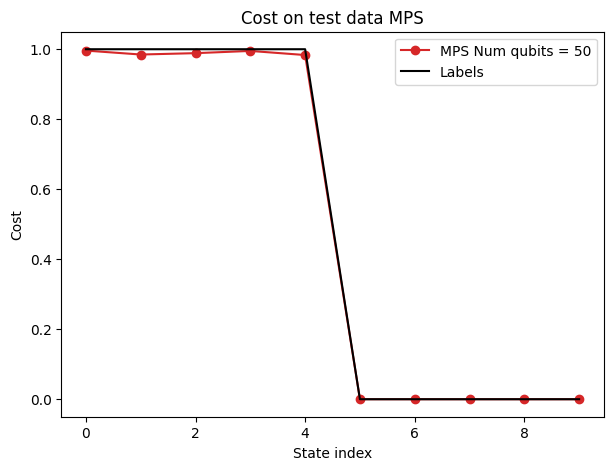

In [ ]:
aer_sim = AerSimulator(method='matrix_product_state')
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(new_mapping_qc)

list_labels = np.append(np.ones(5), np.zeros(5))
obs = SparsePauliOp("Z"*num_qubits)
opt_params = generalize_optimal_params(num_qubits, generate_ansatz(num_qubits), source_list)
options = EstimatorOptions()

results_test_aer_sim = test_shallow_VQC_CPU(num_qubits, list_labels, obs, opt_params, options, aer_sim)

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data MPS')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
print(f"Performance for resilience 0: {compute_performance(results_test_aer_sim, list_labels)}")
ax.plot(results_test_aer_sim, 'o-', color='tab:red', label='MPS Num qubits = ' + str(num_qubits))
ax.plot(list_labels, 'k-', label='Labels')
ax.legend()

In [ ]:
# Submit your answer using following code
grade_lab_bonus_ex3(results_test_aer_sim) # Expected variable types: List

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


## Final step: Testing a 50 qubit VQC on a quantum device (!)

At this point, you should be all set to run your VQC on a real device!  Lets start by choosing our device. For this part of the Lab, we recommend choosing an IBM Quantum backend that you have access to, since we will use these simulations as a guide to run the code on the real backend later on. Take into account that the properties of the devices can change a lot from one to another, so testing the VQC might not work so well for certain devices. We have used [ibm_sherbrooke](https://quantum.ibm.com/services/resources?system=ibm_sherbrooke).

You can find the list of systems you have access to on [the Systems tab](https://quantum.ibm.com/services/resources?resourceType=current-instance&order=queue%20ASC&view=table) on IBM Quantum platform or run the following code:

```python
    from qiskit_ibm_runtime import QiskitRuntimeService

    service = QiskitRuntimeService()
    # list all available systems
    service.backends()
    # get the least busy system
    backend = service.least_busy()
```


<div class="alert alert-block alert-danger">

**Please note:** Please perform the checks above before running it on the real device to ensure you make the best use of your QPU time.

</div>

In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

Let us specify options for our real system run. You can review the explainations on `options` from [Lab 4](https://github.com/qiskit-community/ibm-quantum-challenge-2024/blob/main/content/lab_bonus/lab-bonus.ipynb#Zero-Noise-Extrapolation-(ZNE))

More detais about how to configure `options` for error mitigation with for Qiskit runtime can be found in [this tutorial](https://learning.quantum.ibm.com/tutorial/combine-error-mitigation-options-with-the-estimator-primitive) as well as in [the documentation](https://docs.quantum.ibm.com/run/configure-error-mitigation).




<div class="alert alert-block alert-danger">

**Please note:** For `10000` shots the estimated runtime is around 4 min and for `5000` it will be around 2 minutes. Please be mindful of the QPU time limitation you have on your account
</div>

In [ ]:
# RUN JOBS
num_qubits = no_qubits
obs = SparsePauliOp("Z"*num_qubits)
opt_params = generalize_optimal_params(num_qubits, generate_ansatz(num_qubits), source_list)

for resilience in [0,1]:

    DD = True
    options = EstimatorOptions(default_shots = 1_000,
                            optimization_level=0,
                            resilience_level=resilience)
    options.dynamical_decoupling.enable = DD
    options.dynamical_decoupling.sequence_type = 'XpXm'

    # OPTIONAL
    # options.resilience.zne_mitigation = True
    # options.resilience.zne.noise_factors = (1, 1.2, 1.5)
    # options.resilience.zne.extrapolator = ('exponential', 'linear', 'polynomial_degree_2') #order matters

    job_id = test_shallow_VQC_QPU(num_qubits, list_labels, obs, opt_params, options, backend)
    print(job_id)

Job ID: csrse4gah4b0008crv8g
Status: QUEUED
csrse4gah4b0008crv8g
Job ID: csrse607ynng008yd89g
Status: QUEUED
csrse607ynng008yd89g


##### You can use the cell below to plot your results

Performance for no DD + no TREX: 84.213
Performance for DD + TREX: 81.994


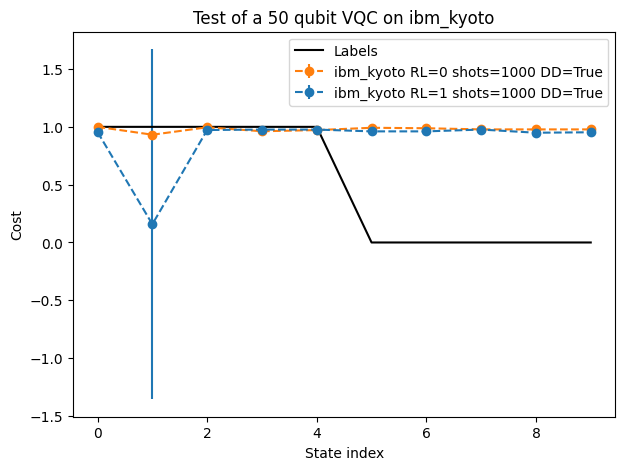

In [ ]:
num_qubits_graph = 50

results_test_0_DD, errors_test_0_DD = retrieve_job('csrse4gah4b0008crv8g')
results_test_1_DD, errors_test_1_DD = retrieve_job('csrse607ynng008yd89g')

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title(f'Test of a {num_qubits_graph} qubit VQC on {backend.name}')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')

print(f"Performance for no DD + no TREX: {compute_performance(results_test_0_DD, list_labels):.3f}")
print(f"Performance for DD + TREX: {compute_performance(results_test_1_DD, list_labels):.3f}")
ax.errorbar(range(10), results_test_0_DD, fmt='--o', yerr=errors_test_0_DD, color='tab:orange', label=f'{backend.name} RL=0 shots={options.default_shots} DD={options.dynamical_decoupling.enable}')
ax.errorbar(range(10), results_test_1_DD, fmt='--o',  yerr=errors_test_1_DD, color='tab:blue', label=f'{backend.name} RL=1 shots={options.default_shots} DD={options.dynamical_decoupling.enable}')

ax.plot(list_labels, 'k-', label='Labels')

ax.legend()

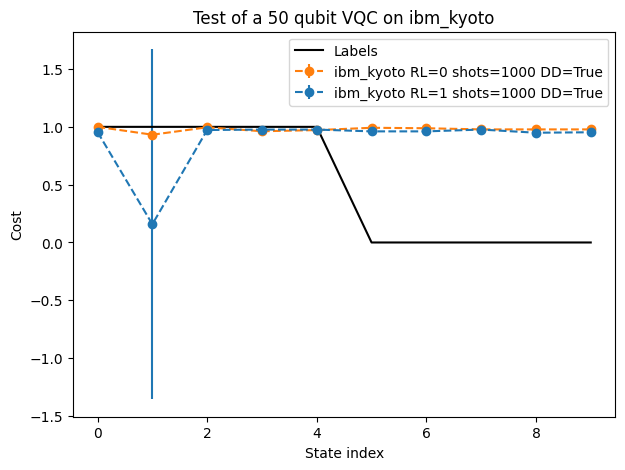

##used same ghz generator as ansatz entanglement(depth too high)

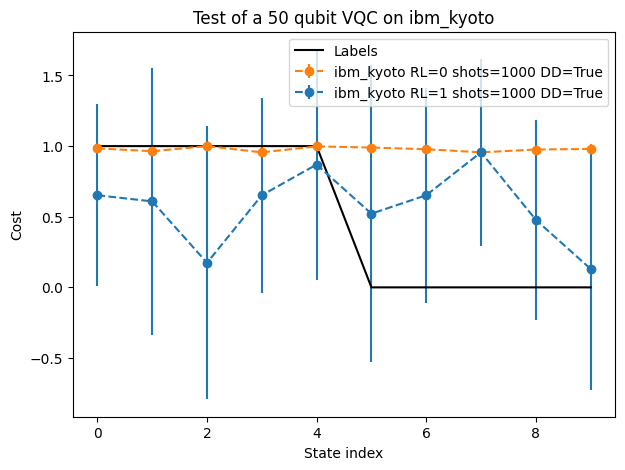

##### Your results should look similar to the ones below. This is a previous job run using `ibm_kyiv`

#5 qubits trial

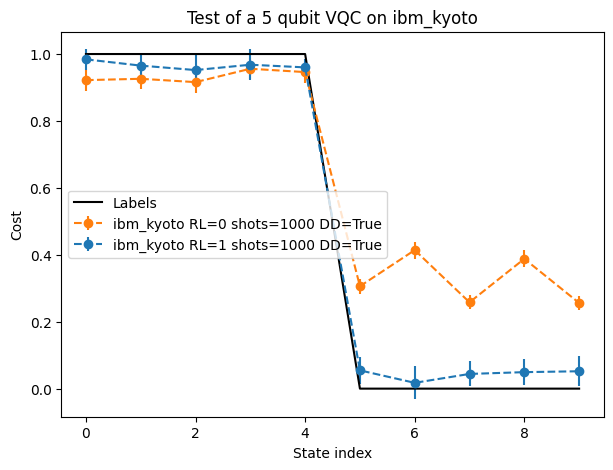

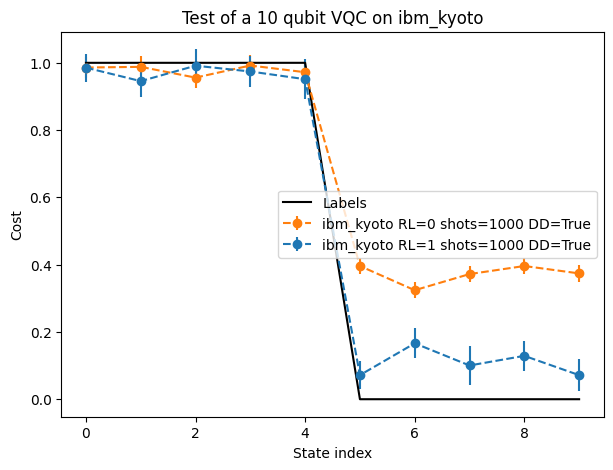

#provided sample for reference

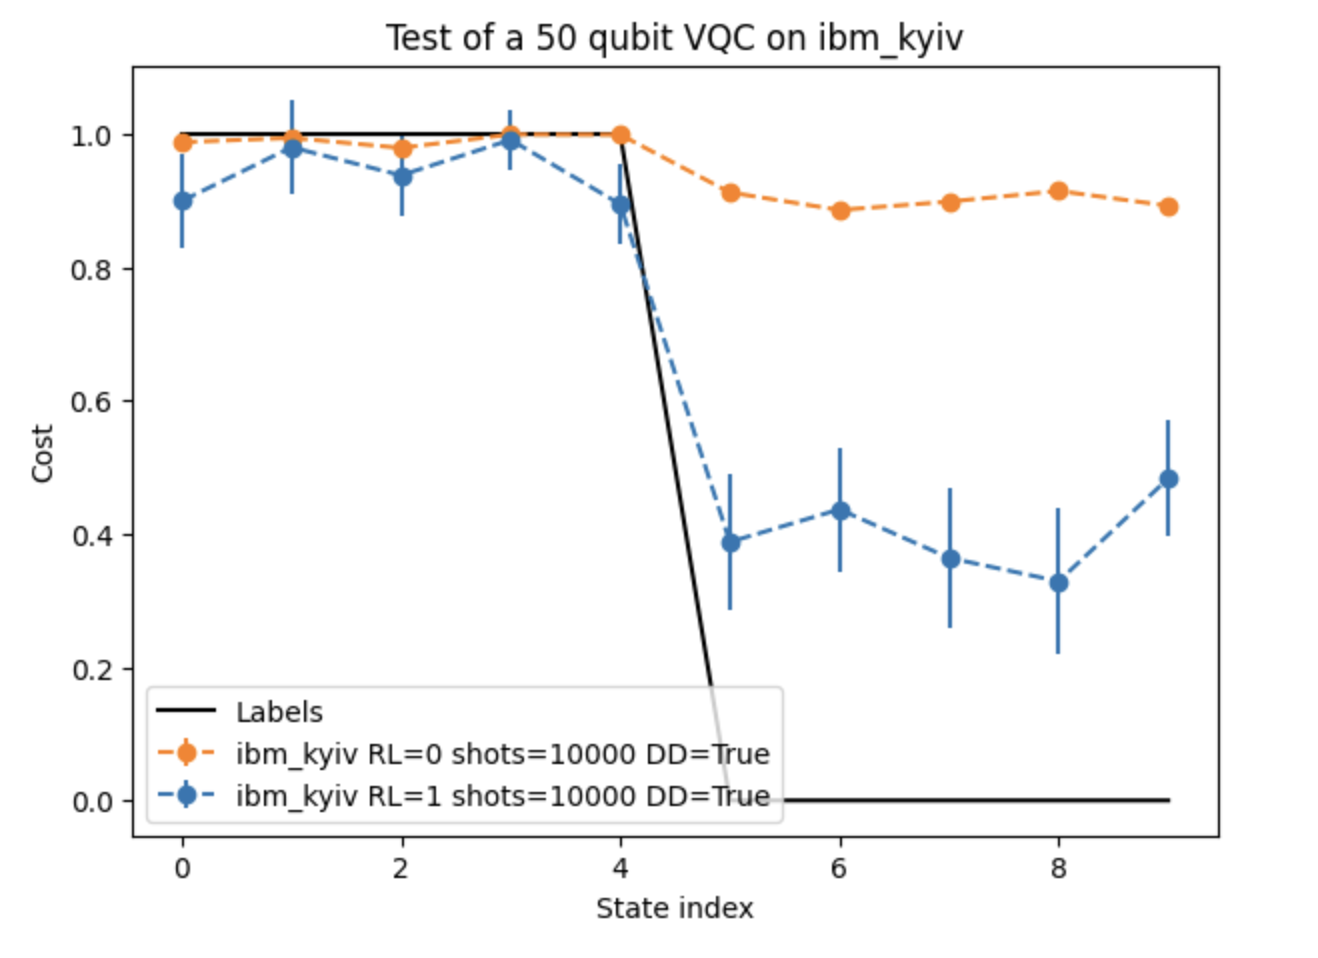

# Additional information

**Created by:** Joana Fraxanet, Marcel Pfaffhauser, Junye Huang, Vishal Sharathchandra Bajpe

**Advised by:** Pedro Rivero

**Version:** 1.0.0